# Data analyzing of the 360-degree videos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import glob
from datetime import datetime as datetime
import time

In [2]:
# Configure panda to show all columns
pd.set_option('display.max_columns', None)

### Merging all the traces found

In [3]:
path = './traces' # use your path
all_files = glob.glob(path + "/*.json")

li = []

for filename in all_files:
    df = pd.read_json(filename)
    li.append(df)

frame = pd.concat(li, ignore_index=True)

In [4]:
# Convert upload date (yyymmdd) to "days since upload"

current_time = datetime.now().timestamp()

for i in frame.index:
    try:
        upload_time = datetime.strptime(str(frame['upload_date'][i]), '%Y%m%d').timestamp()
        ms_since_upload = current_time - upload_time
        days_since_upload = ms_since_upload / 86400
        
        frame['upload_date'][i] =  days_since_upload
    except:
        pass

<ipython-input-4-262d4e5fef3c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame['upload_date'][i] =  days_since_upload


### Inspect data

In [5]:
frame.head(2)

,id,uploader,uploader_id,uploader_url,channel_id,channel_url,upload_date,license,creator,title,alt_title,thumbnails,description,categories,tags,subtitles,automatic_captions,duration,age_limit,annotations,chapters,webpage_url,view_count,like_count,dislike_count,average_rating,formats,is_live,start_time,end_time,series,season_number,episode_number,track,artist,album,release_date,release_year,extractor,webpage_url_basename,extractor_key,playlist,playlist_index,thumbnail,display_id,requested_subtitles,requested_formats,format,format_id,width,height,resolution,fps,vcodec,vbr,stretched_ratio,acodec,abr,ext,fulltitle,_filename,format_note,preference,url,manifest_url,tbr,protocol,player_url,http_headers
0,DXIB8ShnteY,PierreG ASMR,UCaVRk90IytEpDyw9hWNlq6g,http://www.youtube.com/channel/UCaVRk90IytEpDy...,UCaVRk90IytEpDyw9hWNlq6g,http://www.youtube.com/channel/UCaVRk90IytEpDy...,40,NaN,NaN,Is THAT really you 😲?! ASMR 360 VR,NaN,[{'url': 'https://i.ytimg.com/vi/DXIB8ShnteY/h...,Boss told me to find you so I did. But I'm not...,[Entertainment],"[asmr, 360, VR, virtual reality, is that reall...",{},{},646,0,NaN,NaN,https://www.youtube.com/watch?v=DXIB8ShnteY,71144,3550.0,64.0,4.929164,"[{'format_id': '249', 'url': 'https://r6---sn-...",NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,youtube,watch,Youtube,NaN,NaN,https://i.ytimg.com/vi/DXIB8ShnteY/maxresdefau...,DXIB8ShnteY,NaN,"[{'format_id': '266', 'url': 'https://r6---sn-...",266 - 3840x2160 (2160s)+251 - audio only (tiny),266+251,3840,2160,NaN,30,avc1.640033,NaN,NaN,opus,160.0,mp4,Is THAT really you 😲?! ASMR 360 VR,Is THAT really you 😲! ASMR 360 VR-DXIB8ShnteY.mp4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,D9gRJlxJ2iI,VR Gorilla - Virtual Reality & 360 Videos,UC6AXBF-78lNa3_TjAIWZWmQ,http://www.youtube.com/channel/UC6AXBF-78lNa3_...,UC6AXBF-78lNa3_TjAIWZWmQ,http://www.youtube.com/channel/UC6AXBF-78lNa3_...,1422,NaN,NaN,Travel Cuba in 360 degrees VR - Episode 2: Hav...,NaN,[{'url': 'https://i.ytimg.com/vi/D9gRJlxJ2iI/h...,Join VR Gorilla and JetBlue Airways on a trip ...,[Travel & Events],"[virtual reality, cuba, havana, 360, 360 video...",{},{},174,0,NaN,NaN,https://www.youtube.com/watch?v=D9gRJlxJ2iI,111770,349.0,42.0,4.570333,"[{'format_id': '249', 'url': 'https://r3---sn-...",NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,youtube,watch,Youtube,NaN,NaN,https://i.ytimg.com/vi_webp/D9gRJlxJ2iI/maxres...,D9gRJlxJ2iI,NaN,"[{'format_id': '266', 'url': 'https://r3---sn-...",266 - 3840x2048 (2160s)+251 - audio only (tiny),266+251,3840,2048,NaN,30,avc1.640033,NaN,NaN,opus,160.0,mp4,Travel Cuba in 360 degrees VR - Episode 2: Hav...,Travel Cuba in 360 degrees VR - Episode 2 - Ha...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
len(frame.id.unique())

2298

In [7]:
frame.describe()

,upload_date,duration,age_limit,annotations,view_count,like_count,dislike_count,average_rating,is_live,series,season_number,episode_number,release_date,release_year,playlist,playlist_index,requested_subtitles,width,height,resolution,fps,vbr,stretched_ratio,abr,preference,tbr,player_url
count,2946.000000,2946.000000,2946.000000,0.0,2.946000e+03,2.758000e+03,2394.000000,2826.000000,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2946.000000,2946.000000,0.0,2946.000000,0.0,0.0,2782.000000,0.0,3.000000,0.0
mean,753.194501,363.051935,0.073320,NaN,4.609322e+06,3.663658e+04,4877.703843,4.588338,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3606.580448,1942.510523,NaN,34.916497,NaN,NaN,151.189073,NaN,4510.555000,NaN
std,642.690270,1067.068891,1.146659,NaN,1.279300e+07,9.344001e+04,17386.757771,0.435597,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1010.419489,609.748291,NaN,12.625189,NaN,NaN,14.602322,NaN,355.515553,NaN
min,1.000000,0.000000,0.000000,NaN,1.000000e+00,2.000000e+00,2.000000,1.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,480.000000,480.000000,NaN,6.000000,NaN,NaN,128.000000,NaN,4100.041000,NaN
25%,108.000000,113.000000,0.000000,NaN,2.755000e+03,4.200000e+01,21.000000,4.438615,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3840.000000,1920.000000,NaN,30.000000,NaN,NaN,128.000000,NaN,4407.926500,NaN
50%,636.500000,190.000000,0.000000,NaN,1.472165e+05,1.920000e+03,265.000000,4.666666,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3840.000000,2048.000000,NaN,30.000000,NaN,NaN,160.000000,NaN,4715.812000,NaN
75%,1333.000000,331.000000,0.000000,NaN,3.079794e+06,2.812100e+04,3713.500000,4.869174,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3840.000000,2160.000000,NaN,30.000000,NaN,NaN,160.000000,NaN,4715.812000,NaN
max,2107.000000,42900.000000,18.000000,NaN,2.155207e+08,1.137600e+06,634827.000000,5.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8640.000000,8192.000000,NaN,60.000000,NaN,NaN,256.000000,NaN,4715.812000,NaN


In [8]:
print(df.columns.tolist())

['id', 'uploader', 'uploader_id', 'uploader_url', 'channel_id', 'channel_url', 'upload_date', 'license', 'creator', 'title', 'alt_title', 'thumbnails', 'description', 'categories', 'tags', 'subtitles', 'automatic_captions', 'duration', 'age_limit', 'annotations', 'chapters', 'webpage_url', 'view_count', 'like_count', 'dislike_count', 'average_rating', 'formats', 'is_live', 'start_time', 'end_time', 'series', 'season_number', 'episode_number', 'track', 'artist', 'album', 'release_date', 'release_year', 'extractor', 'webpage_url_basename', 'extractor_key', 'playlist', 'playlist_index', 'thumbnail', 'display_id', 'requested_subtitles', 'requested_formats', 'format', 'format_id', 'width', 'height', 'resolution', 'fps', 'vcodec', 'vbr', 'stretched_ratio', 'acodec', 'abr', 'ext', 'fulltitle', '_filename']


In [9]:
len(frame['categories'].apply(sorted).transform(tuple).unique())

15

In [10]:
categories = pd.DataFrame(frame['categories'].apply(sorted).transform(tuple).unique())

In [11]:
categories

,0
0,"(Entertainment,)"
1,"(Travel & Events,)"
2,"(Gaming,)"
3,"(Film & Animation,)"
4,"(Music,)"
5,"(Autos & Vehicles,)"
6,"(People & Blogs,)"
7,"(News & Politics,)"
8,"(Sports,)"
9,"(Comedy,)"


In [12]:
grouped = frame.groupby("categories")

In [13]:
newFrame = frame['categories'].apply(sorted).transform(tuple)

In [14]:
frame["tupleCat"] = newFrame

In [15]:
frame["tupleCat"]

0          (Entertainment,)
1        (Travel & Events,)
2                 (Gaming,)
3       (Film & Animation,)
4                 (Gaming,)
               ...         
2941              (Gaming,)
2942              (Gaming,)
2943              (Gaming,)
2944       (Entertainment,)
2945       (Entertainment,)
Name: tupleCat, Length: 2946, dtype: object

In [16]:
frame.groupby("tupleCat").agg("count")["id"]

tupleCat
(Autos & Vehicles,)          71
(Comedy,)                    40
(Education,)                183
(Entertainment,)            457
(Film & Animation,)         304
(Gaming,)                   798
(Howto & Style,)             22
(Music,)                    156
(News & Politics,)           56
(Nonprofits & Activism,)     28
(People & Blogs,)           293
(Pets & Animals,)            54
(Science & Technology,)     114
(Sports,)                   119
(Travel & Events,)          251
Name: id, dtype: int64

Note: make a bar chart of category video count

## Plotting relations between categories and other characteristics

### Upload date

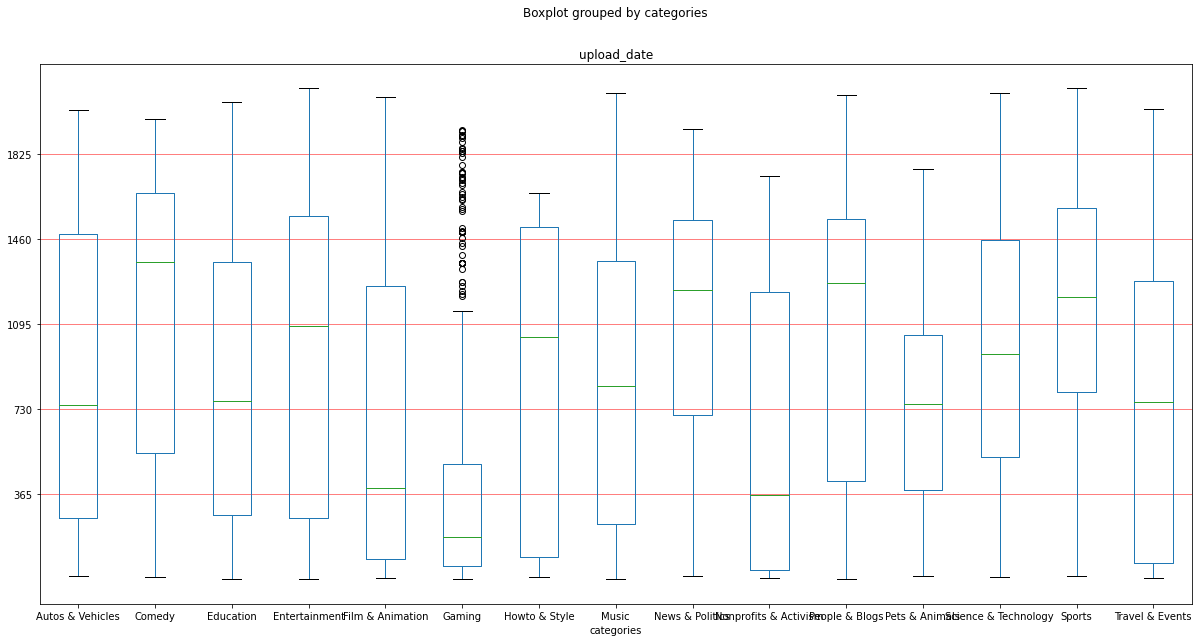

In [17]:
fig, ax = plt.subplots(figsize=(20, 10))
frame.explode('categories').boxplot(by='categories', column=['upload_date'], ax=ax, grid=False)

ax.yaxis.grid(which='major', linestyle='-', linewidth='0.5', color='red')
ax.get_yaxis().set_ticks([365, 730, 1095, 1460, 1825])

### Popularity

#### Plot popularity

Note: like/dislike ratio is not being used for calculating the popularity of a video (see paragraph under graphs).

In [18]:
# For each entry, calculate its popularity
frame['popularity'] = 0.0 # initial float value
frame['like_dislike_ratio'] = 0.0

for i in frame.index:
    view_count = frame['view_count'][i]
    days_since_upload = frame['upload_date'][i]
    like_count = frame['like_count'][i]
    dislike_count = frame['dislike_count'][i]

    like_dislike_ratio = like_count / dislike_count

    popularity = (view_count / float(days_since_upload))# * like_dislike_ratio

    frame['like_dislike_ratio'][i] = like_dislike_ratio
    frame['popularity'][i] =  popularity

<ipython-input-18-25ff2b57a10d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame['like_dislike_ratio'][i] = like_dislike_ratio
<ipython-input-18-25ff2b57a10d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame['popularity'][i] =  popularity


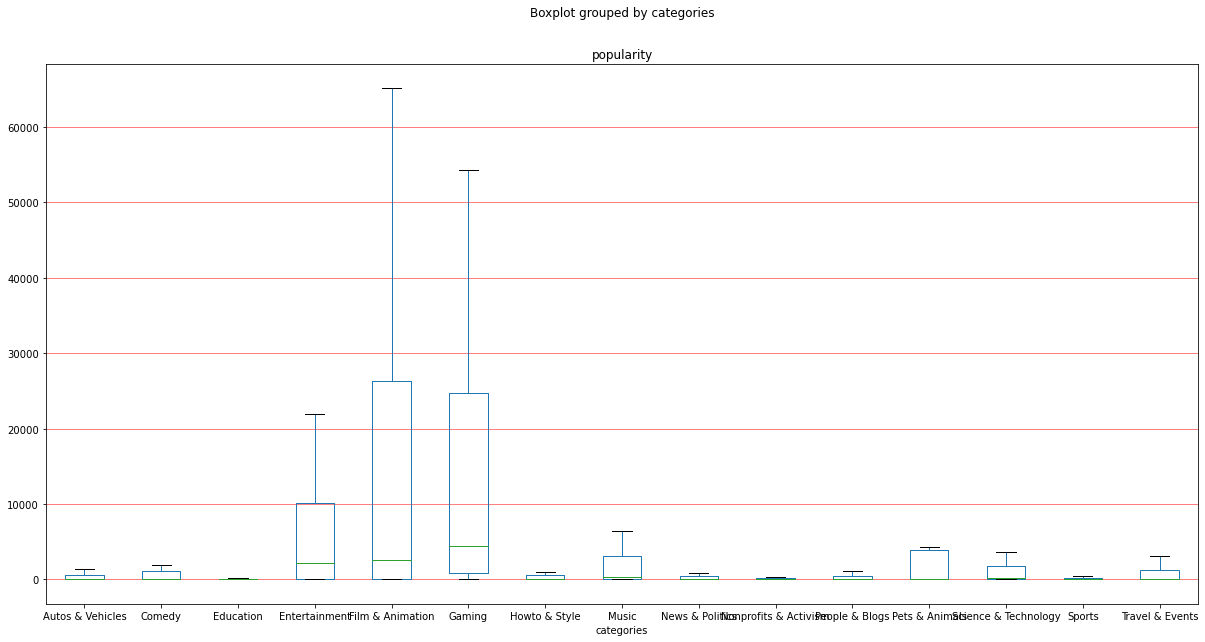

In [19]:
# Plot popularity

fig, ax = plt.subplots(figsize=(20, 10))
frame.explode('categories').boxplot(by='categories', column=['popularity'], ax=ax, grid=False, showfliers=False)

ax.yaxis.grid(which='major', linestyle='-', linewidth='0.5', color='red')

#### Plot like/dislike ratio

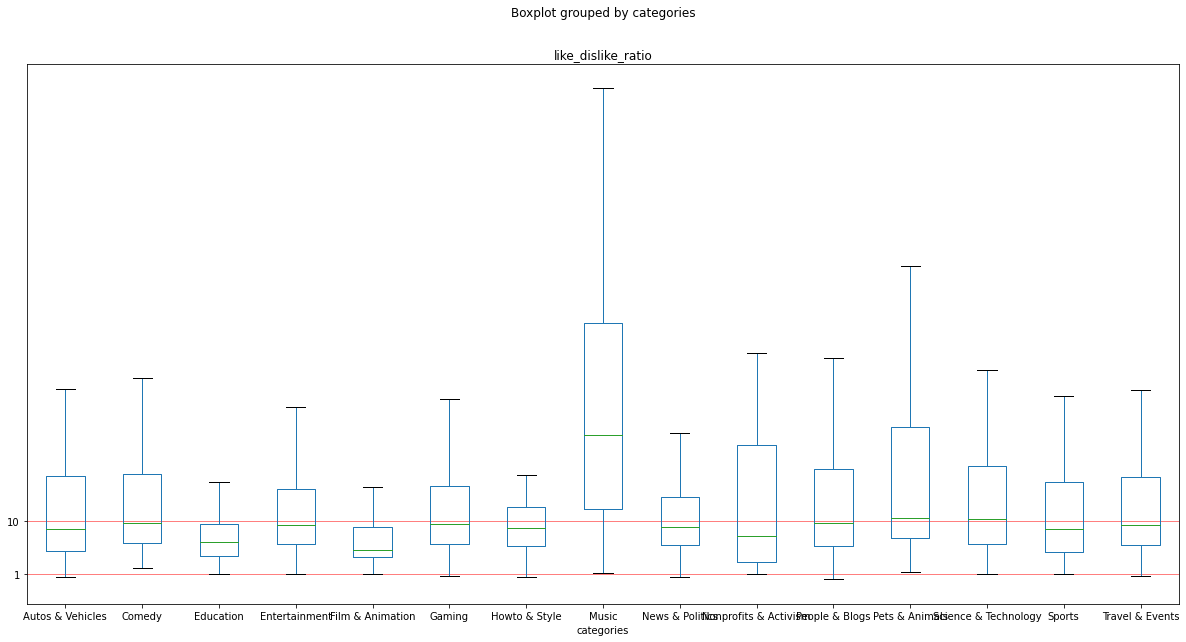

In [20]:
fig, ax = plt.subplots(figsize=(20, 10))
frame.explode('categories').boxplot(by='categories', column=['like_dislike_ratio'], ax=ax, grid=False, showfliers=False)

ax.yaxis.grid(which='major', linestyle='-', linewidth='0.5', color='red')
ax.get_yaxis().set_ticks([1, 10])

In the boxplot above, we find that the ratio between likes and dislikes on a video is hardly ever below 1. Therefore, we may conclude that viewers are more inclined to indicate which videos they like than to indicate which videos they dislike. And indeed, content creators usually encourage their audience to like their videos. Therefore, the ratio between likes and dislikes seems to be positively dominated by a relatively high number of likes.

This means that the like/dislike ratio may overrepresent the positive perception and we must be careful with using this metric.

### Available representations

#### Number of representations

Not solved yet.

In [21]:
df1 = (pd.concat({i: pd.DataFrame(x) for i, x in frame.pop('formats').items()})
         .reset_index(level=1, drop=True)
         .join(frame, rsuffix='_shared')
         .reset_index(drop=True))

df1 = df1[df1.vcodec != "none"]

df1['available_representations'] = df1['formats'].str.len()

fig, ax = plt.subplots(figsize=(20, 10))
df1.explode('categories').boxplot(by='categories', column=['available_representations'], ax=ax, grid=False, showfliers=False)

ax.yaxis.grid(which='major', linestyle='-', linewidth='0.5', color='red')

KeyError: 'formats'

In [ ]:
# df1 = (pd.concat({i: pd.DataFrame(x) for i, x in frame.pop('formats').items()})
#          .reset_index(level=1, drop=True)
#          .join(frame, rsuffix='_shared')
#          .reset_index(drop=True))

# df1 = df1[df1.vcodec != "none"]

#### Average bitrate

In [ ]:
# Create column for average bitrate (kbps)
df1['average_bitrate'] = 0.0

for i in df1.index:
    try:
        file_size_bytes = df1['filesize'][i]
        file_size_bits = file_size_bytes * 8
        
        duration = df1['duration'][i]
        
        average_bitrate = (file_size_bits / float(duration)) / 1000 # average bitrate in kbps
        
        df1['average_bitrate'][i] =  average_bitrate
    except:
        pass

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
df1.explode('categories').boxplot(by='categories', column=['average_bitrate'], ax=ax, grid=False, showfliers=False)

ax.yaxis.grid(which='major', linestyle='-', linewidth='0.5', color='red')

#### File types

In [ ]:
df1.groupby('categories')

In [ ]:
df1.groupby('ext').agg('count')["id"]

#### Framerates

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
df1.explode('categories').boxplot(by='categories', column=['fps'], ax=ax, grid=False, showfliers=True)

ax.yaxis.grid(which='major', linestyle='-', linewidth='0.5', color='red')

#### Durations

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
df1.explode('categories').boxplot(by='categories', column=['duration'], ax=ax, grid=False, showfliers=False)

ax.yaxis.grid(which='major', linestyle='-', linewidth='0.5', color='red')